In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [10]:
products = pd.read_csv("data/product.csv", sep='\t')
sessions = pd.read_csv("data/session.csv", sep='\t')
users = pd.read_csv("data/user.csv", sep='\t')

In [11]:
users.head()

,username,residence,current_location,name,mail,job,sex,race,address,birthdate,user_id
0,gabrieladas-neves,NaN,"(Decimal('-37.802134'), Decimal('79.453092'))",Sabrina da Luz,xda-cunha@yahoo.com.br,Engenheiro aeronáutico,NaN,NaN,"Condomínio de Silva, 16\nNovo Ouro Preto\n6891...",NaN,640
1,ferreirajulia,NaN,"(Decimal('4.633756'), Decimal('102.063245'))",Maria Vitória Mendes,catarinada-conceicao@gmail.com,Mãe social,F,black,"Campo Eloah Ribeiro, 66\nEstrela Do Oriente\n2...",1946-06-27,1222
2,isadora80,NaN,"(Decimal('80.9854585'), Decimal('135.043616'))",Isabella Nascimento,maria-sophiasouza@ig.com.br,NaN,NaN,NaN,Viela da Luz\nConjunto Santa Maria\n92354128 A...,1940-12-01,298
3,adriana04,NaN,"(Decimal('67.6271835'), Decimal('-41.336778'))",Daria Boldù,ngaleati@alice.it,NaN,NaN,NaN,"Vicolo Sophia, 452 Piano 7\n26843, Meleti (LO)",1958-02-01,316
4,kellygreg,NaN,"(Decimal('39.336945'), Decimal('120.879401'))",Sandra Jenkins,danieljordan@yahoo.com,Fine artist,NaN,NaN,31740 Maria Stravenue Apt. 240\nLake Rodneyfur...,1997-05-26,1992


In [12]:
sessions.head()

,pct_wild_mouse,screen_height,pct_input,pct_scrandom,pct_scroll_move,pct_click_product_info,wild_mouse_duration,session_start,total_load_time,pct_click,...,session_id,pct_scroll_move_duration,ack,scroll_move_total_rel_distance,page_activity_duration,mouse_move_total_rel_distance,browser_name,pct_rage_click,session_duration,pct_mouse_click
0,33.93175,600,2.02433,47.57172,77.67966,50.06169,16.15405,2022-04-16 18:13:19,3.66109,15.21849,...,341891,17.64845,0.0,13.31028,15.50704,16.78128,safari,73.88232,93.50794,NaN
1,35.01962,768,2.73613,44.98978,40.38256,53.78582,16.44725,2022-09-07 09:34:07,3.06183,17.79744,...,1302699,16.90542,1.0,18.33657,15.76245,16.67535,firefox,36.27018,83.05534,15.63971
2,61.41151,800,2.30551,56.16179,29.32719,61.74431,16.28032,2022-08-01 19:22:50,4.30491,16.56530,...,1346090,20.42301,1.0,7.24767,15.94806,17.84916,opera,44.07316,212.16973,13.54653
3,44.86510,600,4.67376,51.02882,57.35852,44.10727,16.97307,2020-03-28 06:00:21,2.66177,14.10738,...,320000,19.13251,0.0,9.27093,17.21545,15.85436,edge,61.91555,62.13615,14.83673
4,61.66559,800,6.29241,33.35663,50.05876,36.03935,17.26692,2023-02-12 18:25:13,3.67287,19.04736,...,291366,13.65667,0.0,19.71573,17.01892,16.65385,chrome,21.36066,157.60814,15.17088


In [13]:
products.head()

,code,location,store_name,product_ean
0,HR,Europe/Zagreb,Split,3618641987900
1,CN,Asia/Shanghai,Heyuan,890698872559
2,NL,Europe/Amsterdam,Barneveld,2447491624236
3,MX,America/Mexico_City,Tuxtla,2920947188549
4,US,America/New_York,Sun City Center,4869841703558


**Identifikácia problémov v dátach s prvotným riešením**

**Nájdené chyby v datasete**<br />
*V datasete users:*<br />
1. Viacero rôzdnych userov ma rovnake user_id, čo by sa nemalo stávať, kedže id je unikátke identifikačné číslo (neviem ako opraviť, spýtať sa na cviku)
2. V stlpci race sa nachádza hodnota "unspecified" a aj NaN, čo v tomto kontexte je to isté (zatiaľ som nemenila, radšej sa spýtať)
3. Dátum je vo formáte object, nie v dátumovom, aj ked sa to nepovažuje za chybu, plánujem to zmeniť kvôli jednoduchšej práci v budúcnosti s týmto atribútom (opravené)<br />

*V datasete session*<br />
1. Stlpec ack je vo formáte float a nie int, čo je zbytočné (opravené)
2. Nachádzajú sa tu duplikáty (opravené)
3. V stlpcoch screen_height a screen_width su okrem číselných hodnôt aj hodnoty "lower" a "higher", je to správne? (spýtať sa na cviku)
4. Dátum je vo formáte object, nie v dátumovom, aj ked sa to nepovažuje za chybu, plánujem to zmeniť kvôli jednoduchšej práci v budúcnosti s týmto atribútom (opravené)

*V datasete products som nenašla žiadne*

**Nájdené chyby, ale zatiaľ to nepotrebujeme meniť alebo je ich zbytočné meniť**

1. Adresa v datasete users je v rôzdnych formátoch, pretože že užívatelia sú z rôzdnych krajín = nepoužiteľný atribút, rovnako atribút residence
2. V datasete products v určitých záznamoch je atribút code NaN, preto bude ťažšie a nepresnejšie určiť, či niektoré krajiny nenakupovali viac ako iné
3. Veľa záznamov z datasetu users má atribúty "race" a "sex" NaN, to je veľmi zlé, pretože nám dané atribúty prídu ako dobrý atribút k naučeniu modelu ohľadom ack
4. Príde nám, že v datasetoch sa nachádza veľa atribútov, ktoré sú nám zbytočné k predikcií, či ack bude 0 alebo 1, pretože ich hodnota je pre každý záznam iná a nič nám nehovorí ako napríklad v datasete users: username, residence, address, email, name

**Oprava chýb**

*dataset users:*

Viacero rôzdnych userov ma rovnake id:

In [14]:
users[users.duplicated(['user_id'], keep=False)].sort_values(by=['user_id'])

,username,residence,current_location,name,mail,job,sex,race,address,birthdate,user_id
468,rgagliano,"Borgo Enzio, 952\n38079, Zuclo (TN)","(Decimal('-5.5622835'), Decimal('74.988399'))",Lucia Bernardi,lovatoirma@alice.it,Industrial buyer,F,NaN,NaN,1960-02-14,0
2309,mrespighi,"Borgo Mazzeo, 745\n57023, Cecina (LI)","(Decimal('-29.1689195'), Decimal('-100.115429'))",Iolanda Zaccagnini,galassocomboni@tin.it,NaN,F,NaN,NaN,NaN,0
1420,calebe81,NaN,"(Decimal('43.9746415'), Decimal('-97.099022'))",Dra. Amanda da Cruz,daniel17@yahoo.com.br,NaN,F,NaN,"Ladeira de Moraes, 86\nVila Santo Antônio\n714...",2009-03-07,1
1242,ntroisi,NaN,"(Decimal('-57.011445'), Decimal('162.011851'))",Dott. Antonietta Schiavone,nicolo94@vodafone.it,NaN,NaN,NaN,"Strada Pietro, 340 Appartamento 80\n52011, Ban...",1984-02-04,1
486,kyosukenakamura,NaN,"(Decimal('15.5675825'), Decimal('-33.631112'))",伊藤 淳,mituru67@yahoo.com,映画監督,M,white,茨城県夷隅郡大多喜町東大和町17丁目21番11号,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
2298,mattia56,NaN,"(Decimal('57.9631195'), Decimal('165.134342'))",Gioachino Baroffio,filippo96@libero.it,Tour manager,NaN,NaN,NaN,NaN,2535
585,larapacillo,"Contrada Altera, 60\n91027, Dattilo (TP)","(Decimal('-59.595116'), Decimal('-155.946000'))",Arturo Curatoli,argenterogiuliano@virgilio.it,"Copywriter, advertising",M,NaN,"Vicolo Zoppetto, 8 Piano 8\n81043, Sant'Angelo...",1946-10-07,2535
428,taichisuzuki,NaN,"(Decimal('-31.3694265'), Decimal('-34.731815'))",斎藤 花子,asukasuzuki@gmail.com,作曲家,NaN,NaN,福島県山武郡芝山町西小来川2丁目3番11号 美原町コーポ427,NaN,2536
491,pospisilmichal,Jeruzalémská 6\n787 38 Vratimov,"(Decimal('-24.4687115'), Decimal('-109.887871'))",Renáta Moravcová,ikral@seznam.cz,Art therapist,NaN,NaN,Čerpadlová 6\n678 39 Toužim,NaN,2536


Stlpec race má hodnoty NaN a "unspecified", čo môže byť v kontexte to isté

In [15]:
users['race'].unique()

array([nan, 'black', 'asian', 'white', 'indian', 'unspecified'],
      dtype=object)

Dátum (stlpec birthdate) je vo formáte object, idem zmeniť na dátumový typ

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   username          2538 non-null   object
 1   residence         888 non-null    object
 2   current_location  2411 non-null   object
 3   name              2538 non-null   object
 4   mail              2538 non-null   object
 5   job               1015 non-null   object
 6   sex               1269 non-null   object
 7   race              761 non-null    object
 8   address           2157 non-null   object
 9   birthdate         1396 non-null   object
 10  user_id           2538 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 218.2+ KB


In [17]:
users['birthdate'] = pd.to_datetime(users['birthdate'], errors='coerce')

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   username          2538 non-null   object        
 1   residence         888 non-null    object        
 2   current_location  2411 non-null   object        
 3   name              2538 non-null   object        
 4   mail              2538 non-null   object        
 5   job               1015 non-null   object        
 6   sex               1269 non-null   object        
 7   race              761 non-null    object        
 8   address           2157 non-null   object        
 9   birthdate         1396 non-null   datetime64[ns]
 10  user_id           2538 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 218.2+ KB


*dataset sessions*

Stlpec ack z formátu float na int

In [19]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_wild_mouse                  11083 non-null  float64
 1   screen_height                   11094 non-null  object 
 2   pct_input                       11083 non-null  float64
 3   pct_scrandom                    11083 non-null  float64
 4   pct_scroll_move                 11083 non-null  float64
 5   pct_click_product_info          11083 non-null  float64
 6   wild_mouse_duration             11083 non-null  float64
 7   session_start                   11094 non-null  object 
 8   total_load_time                 11094 non-null  float64
 9   pct_click                       11083 non-null  float64
 10  screen_width                    11094 non-null  object 
 11  pct_doubleclick                 11081 non-null  float64
 12  product_ean                     

In [20]:
sessions['ack']=sessions['ack'].astype(int)

In [21]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_wild_mouse                  11083 non-null  float64
 1   screen_height                   11094 non-null  object 
 2   pct_input                       11083 non-null  float64
 3   pct_scrandom                    11083 non-null  float64
 4   pct_scroll_move                 11083 non-null  float64
 5   pct_click_product_info          11083 non-null  float64
 6   wild_mouse_duration             11083 non-null  float64
 7   session_start                   11094 non-null  object 
 8   total_load_time                 11094 non-null  float64
 9   pct_click                       11083 non-null  float64
 10  screen_width                    11094 non-null  object 
 11  pct_doubleclick                 11081 non-null  float64
 12  product_ean                     

Duplikátne riadky, odstranili sme z datasetu sessions 102 duplikátov

In [22]:
duplikatne_riadky = sessions[sessions.duplicated()]

In [23]:
sessions.shape

(11094, 25)

In [24]:
sessions.drop_duplicates(inplace=True)

In [25]:
sessions.shape

(10962, 25)

Stlpce screen_width a screen_height

In [26]:
sessions['screen_height'].unique()

array(['600', '768', '800', '1024', '1080', 'lower', 'higher'],
      dtype=object)

In [27]:
sessions.screen_height.value_counts()

screen_height
1080      2205
768       2148
800       1673
600       1672
1024      1628
lower     1095
higher     541
Name: count, dtype: int64

In [28]:
sessions['screen_width'].unique()

array(['1366', '1280', '1920', '1024', '800', 'lower', 'higher'],
      dtype=object)

In [29]:
sessions.screen_width.value_counts()

screen_width
1920      2297
1280      2278
1366      1660
800       1616
1024      1552
lower     1065
higher     494
Name: count, dtype: int64

Dátum (stlpec session_start) je vo formáte object, idem zmeniť na dátumový typ

In [30]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10962 entries, 0 to 11093
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_wild_mouse                  10951 non-null  float64
 1   screen_height                   10962 non-null  object 
 2   pct_input                       10951 non-null  float64
 3   pct_scrandom                    10951 non-null  float64
 4   pct_scroll_move                 10951 non-null  float64
 5   pct_click_product_info          10951 non-null  float64
 6   wild_mouse_duration             10951 non-null  float64
 7   session_start                   10962 non-null  object 
 8   total_load_time                 10962 non-null  float64
 9   pct_click                       10951 non-null  float64
 10  screen_width                    10962 non-null  object 
 11  pct_doubleclick                 10951 non-null  float64
 12  product_ean                     10962

In [31]:
sessions['session_start'] = pd.to_datetime(sessions['session_start'], errors='coerce')

In [32]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10962 entries, 0 to 11093
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   pct_wild_mouse                  10951 non-null  float64       
 1   screen_height                   10962 non-null  object        
 2   pct_input                       10951 non-null  float64       
 3   pct_scrandom                    10951 non-null  float64       
 4   pct_scroll_move                 10951 non-null  float64       
 5   pct_click_product_info          10951 non-null  float64       
 6   wild_mouse_duration             10951 non-null  float64       
 7   session_start                   10962 non-null  datetime64[ns]
 8   total_load_time                 10962 non-null  float64       
 9   pct_click                       10951 non-null  float64       
 10  screen_width                    10962 non-null  object        
 11  pct_dou

**Hypotéza**

$H_0$: Ženy nakupujú viac ako muži, teda ked používateľ má pohlavie žena, tak je väčšia pravdepodobnosť, že bude mať atribút ack=1

$H_0A$: Pravdepodobnosť hodnoty atribútu ack=1 *je nezávislá* od pohlavia

Ako prvé sme spojili datasety a zobrali si z nich atribúty, ktoré iba potrebujeme

In [33]:
merged_data_hypoteza1 = pd.merge(users[['user_id', 'sex']], sessions[['user_id', 'ack']], on='user_id')

In [34]:
merged_data_hypoteza1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  11069 non-null  int64 
 1   sex      5587 non-null   object
 2   ack      11069 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 216.3+ KB


In [35]:
merged_data_hypoteza1.head()

,user_id,sex,ack
0,640,NaN,0
1,640,NaN,0
2,640,NaN,0
3,640,NaN,1
4,640,M,0


Dalej sme odstránili záznamy, ktoré obsahovali NaN hodnotu v atribúte sex

In [36]:
merged_data_hypoteza1.dropna(subset=['sex'])

,user_id,sex,ack
4,640,M,0
5,640,M,0
6,640,M,0
7,640,M,1
8,1222,F,0
...,...,...,...
11063,1038,F,1
11064,1038,F,1
11065,1038,F,0
11066,1038,F,0


Vytvorili sme s 2 datasety, jeden iba pre ženy a druhý iba pre mužov

In [49]:
females = merged_data_hypoteza1[merged_data_hypoteza1['sex'] == 'F']
males = merged_data_hypoteza1[merged_data_hypoteza1['sex'] == 'M']
females.head()


,user_id,sex,ack
8,1222,F,0
9,1222,F,1
10,1222,F,0
11,1222,F,0
12,1222,F,1


In [48]:
males.head()

,user_id,sex,ack
4,640,M,0
5,640,M,0
6,640,M,0
7,640,M,1
29,1970,M,1


Spočítali sme si v datasetoch pre ženu aj pre muža počet hodnôt ack=1 a ack=0

In [52]:
female_ack = females['ack'].value_counts()
female_ack

ack
1    1517
0    1334
Name: count, dtype: int64

In [53]:
male_ack = males['ack'].value_counts()
male_ack

ack
1    1510
0    1226
Name: count, dtype: int64

Vytvorili sme si koláčové grafy, ktoré nám zobrazujú počty ack=1 a ack=0 na základe pohlavia

Text(0.5, 1.0, 'Females')

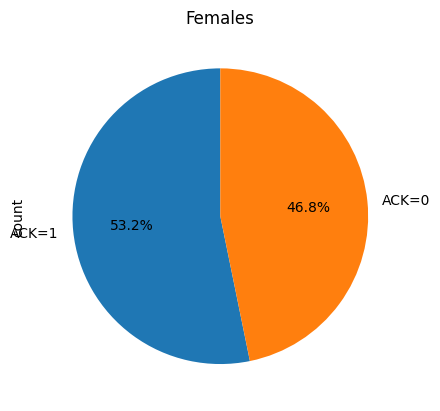

In [64]:
female_ack.plot(kind='pie', y='ack', labels=['ACK=1', 'ACK=0'], autopct='%1.1f%%', startangle=90).set_title('Females')

Text(0.5, 1.0, 'Males')

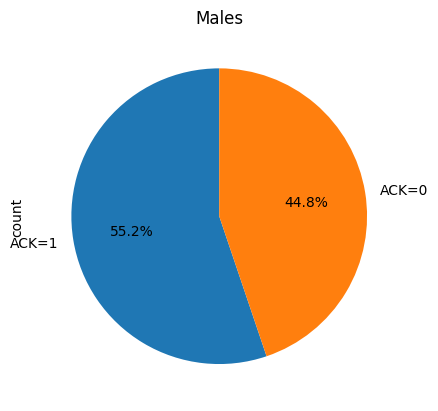

In [65]:
male_ack.plot(kind='pie', y='ack', labels=['ACK=1', 'ACK=0'], autopct='%1.1f%%', startangle=90).set_title('Males')

Z koláčových grafov môžeme vidieť, že je iba 2% rozdiel medzi ženami a mužmi

**Text z cvičeni**<br />
Shapiro-Wilkov test testuje nulovú hypotézu, že dáta pochádzajú z normálneho rozdelenia.<br />
Ak j p<0,05
, nulovú hypotézu zamietame a dáta pravdepodobne pochádzajú z iného ako normálneho rozdeleni<br />
. Ak  p>0,05 
, nulovú hypotézu nezamietame, teda na základe dát nemôžeme prehlásiť, že by dáta pochádzali z iného, ako normálneho rozdelen<br />ia.

In [75]:
dataTest1_females=merged_data_hypoteza1[merged_data_hypoteza1['sex'] == 'F']['ack']
dataTest1_males=merged_data_hypoteza1[merged_data_hypoteza1['sex'] == 'M']['ack']

In [78]:
stats.shapiro(dataTest1_females)

ShapiroResult(statistic=0.635128378868103, pvalue=0.0)

In [79]:
stats.shapiro(dataTest1_males)

ShapiroResult(statistic=0.6326707601547241, pvalue=0.0)

p je menšie ako 0,05 v oboch prípadoch, čo znamená, že $H_0$ zamietame. Oba datasety pochádzajú pravdepodobne z iného ako normálového rozdelenia. Nespĺňame už prvú podmienku na parametrický test, takže nie je potrebné zisťovať varianciu. Musíme urobiť neparametrický test.

In [80]:
stats.mannwhitneyu(dataTest1_females, dataTest1_males)

MannwhitneyuResult(statistic=3822919.0, pvalue=0.1374883818320964)

p je väčšie ako 0,05, čo znamená, že nemôžeme zamietnuť $H_0$ a teda nemáme dôkaz o tom, že by existoval štatisticky významný rozdiel v pravdepodobnosti nákupu medzi ženami a mužmi.